# Индивидуальное задание

In [1]:
import cv2 as cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [2]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

In [3]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

Создадим зашумлённое изображение типа соль/перец

In [4]:
imagge = img_input('pic/jotaro.jpg', type=0)

In [5]:
image = Image.open('pic/jotaro.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("pic/median_Ind.png", "JPEG")

noise = cv2.imread("pic/median_Ind.png", 0)

Подготовим ядро для дальнейших преобразований

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

Применим к данному изображению различные морфологические преобразования

1) Дилатация - увеличивает размер объекта на изображении.

In [7]:
dilation = cv2.dilate(imagge,kernel,iterations = 2)

2) Эрозия - уменьшает размер объекта на изображении.

In [8]:
erosion = cv2.erode(imagge, kernel,iterations = 2)

3) Градиент - разница между дилатацией и эрозией, используется для выделения границ объектов.

In [9]:
gradient = cv2.morphologyEx(imagge, cv2.MORPH_GRADIENT, kernel)

4) Топ-хэт - разница между исходным изображением и открытием, используется для выделения мелких объектов на фоне.

In [10]:
top_hat = cv2.morphologyEx(imagge, cv2.MORPH_TOPHAT, kernel)

5) Блэк-хэт - разница между закрытием и исходным изображением, используется для выделения мелких объектов на фоне.

In [11]:
black_hat = cv2.morphologyEx(imagge, cv2.MORPH_BLACKHAT, kernel)

6) Открытие - сочетание эрозии и дилатации, используется для удаления мелких объектов и зашумления.

In [12]:
opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)

7) Закрытие - сочетание дилатации и эрозии, используется для заполнения небольших полостей в объектах и зашумления.

In [13]:
closing = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)

Выведем результаты

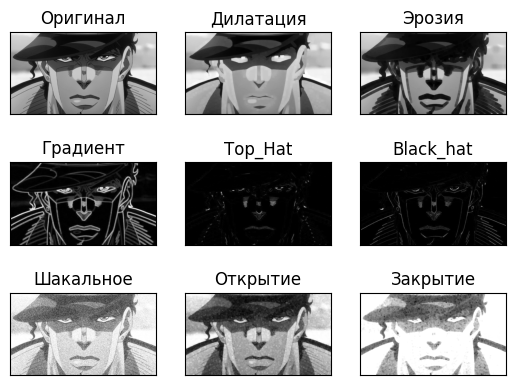

In [14]:
res = [imagge, dilation, erosion,gradient ,top_hat, black_hat, noise, opening, closing]
title = ['Оригинал','Дилатация','Эрозия','Градиент','Тор_Наt','Black_hat','Шакальное','Открытие','Закрытие']

img_print(res, title, row_and_colm=(3,3), hard_type='gray')